# Project 2: Linear Regression with Julia

## Huy Huynh

## DATA 4319

Linear Regression is one of the most basic machine learning algorithms that is used to predict a dependent variable based on one or more independent variables. The dependent variable (Y) should be continuous. Linear regression finds the mathematical equation that best describes the Y variable as a function of the X variables (features). Once the equation is formed, it can be used to predict the value of Y when only the X is known.

This mathematical equation can be generalized as follows:

![1](https://miro.medium.com/max/1662/1*39FkA9sgT6E_txFT_KANjw.png)

If there is only one X variable, it is called ‘Simple Linear Regression’. If more than one predictor (X) is involved, it is called ‘Multiple Linear Regression’. Nevertheless, the procedure the build either of them is pretty much the same.

## Project 

In [1]:
using Plots
using Random

In [2]:
# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

# Developer Salary
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

38-element Vector{Int64}:
  17784
  16500
  18012
  20628
  25206
  30252
  34368
  38496
  42000
  46752
  49320
  53200
  56000
      ⋮
  95000
  90000
  91633
  91660
  98150
  98964
 100000
  98988
 100000
 108923
 105000
 103117

In [15]:
data = [x for x in zip(ages_x, dev_y)]

38-element Vector{Tuple{Int64, Int64}}:
 (18, 17784)
 (19, 16500)
 (20, 18012)
 (21, 20628)
 (22, 25206)
 (23, 30252)
 (24, 34368)
 (25, 38496)
 (26, 42000)
 (27, 46752)
 (28, 49320)
 (29, 53200)
 (30, 56000)
 ⋮
 (44, 95000)
 (45, 90000)
 (46, 91633)
 (47, 91660)
 (48, 98150)
 (49, 98964)
 (50, 100000)
 (51, 98988)
 (52, 100000)
 (53, 108923)
 (54, 105000)
 (55, 103117)

In [5]:
#set a random subset of data into train and test
train_x = randsubseq(ages_x, .7)
train_y=[x[2] for x in data if x[1] in train_x ]
train_data=[x for x in zip(train_x,train_y)]
            
test_data = [x for x in data if x ∉ train_data]

9-element Vector{Tuple{Int64, Int64}}:
 (19, 16500)
 (20, 18012)
 (24, 34368)
 (29, 53200)
 (37, 78000)
 (38, 78508)
 (43, 90056)
 (51, 98988)
 (52, 100000)

In [6]:
X=ones(length(train_x),2)
X[:,1]=train_x

ŵ = (X'X)\(X'*train_y)

2-element Vector{Float64}:
   2480.2672942068393
 -20678.278413039505

In [7]:
prediction(x) = ŵ[1] *x + ŵ[2]

prediction (generic function with 1 method)

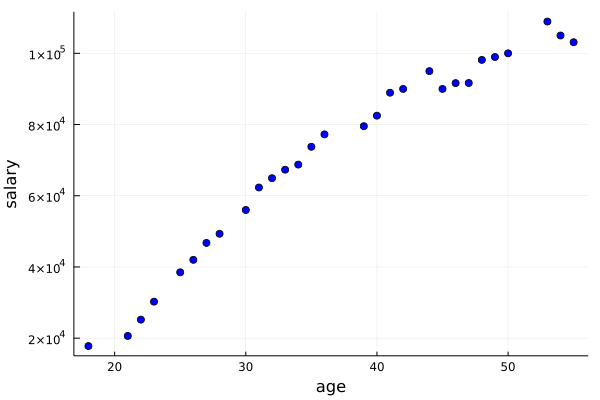

In [8]:
scatter([p for p in train_data],
        xaxis = "age",
        yaxis = "salary",
        color = "blue",
        label = false)

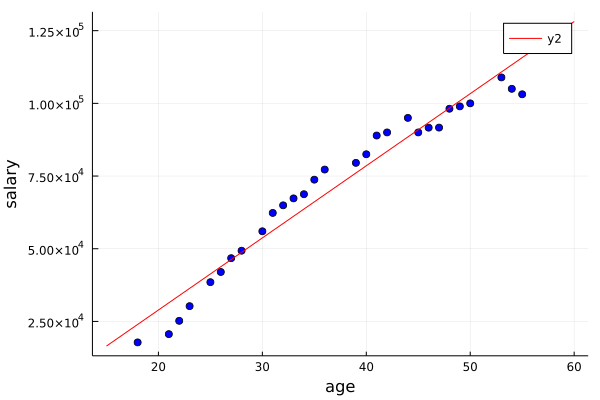

In [9]:
plot!([(x , prediction(x)) for x = 15:60], color = "red")

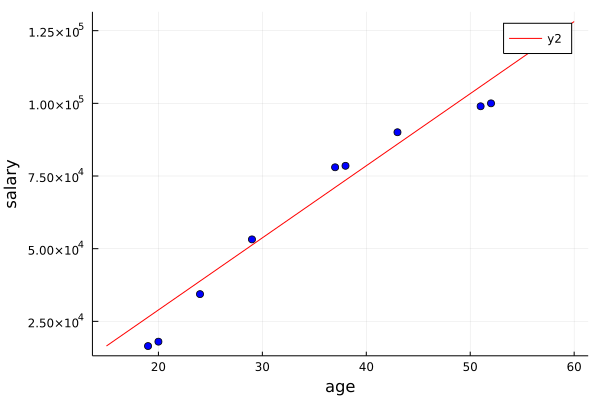

In [10]:
scatter(test_data,
        xaxis = "age",
        yaxis = "salary",
        color = "blue",
        label = false)
plot!([(x , prediction(x)) for x = 15:60], color = "red")

In [11]:
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data]


29-element Vector{Float64}:
  6182.532882683601
 10779.334765304124
  8681.602059510958
  6115.869353717804
  2832.403942131481
  1808.6712363383122
   463.06146945484215
   550.7941752479965
  2270.2595868343196
  6105.9922926274885
  6237.724998420643
  6146.457704213797
  5097.190410006966
     ⋮
  7922.31935055909
  6507.052056352244
  6546.517467938567
   933.7498262682639
  1781.0171204751096
  4234.284414681941
   224.55170888878638
  1890.819003095632
  3335.086297302463
  1852.8881799229857
  8256.155474129817
 12619.422768336648

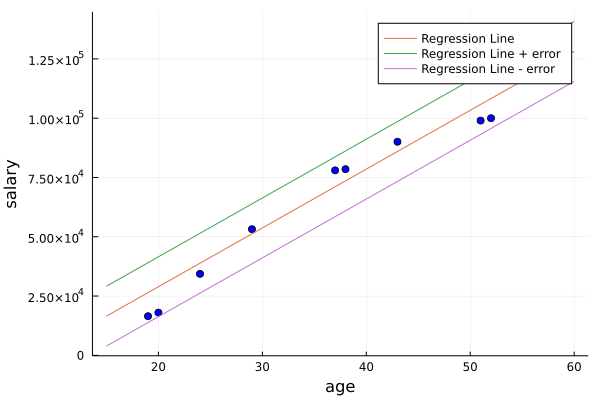

In [12]:
scatter(test_data,
        xaxis = "age",
        yaxis = "salary",
        color = "blue",
        label = false)
plot!([(x , prediction(x)) for x = 15:60],
        label = "Regression Line")
plot!([(x , prediction(x) + maximum(error_array)) for x = 15:60],
        label = "Regression Line + error")
plot!([(x , prediction(x) - maximum(error_array)) for x = 15:60],
        label = "Regression Line - error")

In [13]:
prediction_interval(x) = (prediction(x)- maximum(error_array), prediction(x)+ maximum(error_array))

prediction_interval (generic function with 1 method)

In [14]:
prediction_interval(41)

(68393.25788110426, 93632.10341777756)